In [20]:
import re
import nltk
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import numpy as np

In [3]:
text = ""
with open('./texts.txt', mode='r', encoding='utf-8') as file:
    text = file.read()

punctuation_chars = r'[!?.]'
sentences = re.split(punctuation_chars, text)

print('Number of sentences: ', len([x for x in sentences if x.strip()]))


Number of sentences:  10


In [5]:
new_text = text.replace('\n', ' ')
new_text = new_text.replace('.', ' ')
new_text = new_text.replace(':', ' ')
new_text = new_text.replace('?', ' ')
new_text = new_text.replace('\"', ' ')
new_text = new_text.replace('!', ' ')
new_text = new_text.replace(',', ' ')
new_text = new_text.replace('-', ' ')
new_text = new_text.replace('”', ' ')

unique_words = []
for word in [x for x in new_text.split(' ') if x.strip()]:
    if word not in unique_words:
        unique_words += [word]
        
print('Number of words: ', len([x for x in new_text.split(' ') if x.strip()]))   
print('Number of unique words: ', len(unique_words))


Number of words:  160
Number of unique words:  97


In [7]:
shortest_words = [unique_words[0]]
longest_words = [unique_words[0]]

for word in [w for w in unique_words if all(not c.isdigit() for c in w)]:
    if len(word) < len(shortest_words[0]):
        shortest_words = [word]
    if len(word) > len(longest_words[0]):
        longest_words = [word]
    if len(word) == len(shortest_words[0]) and word != shortest_words[0]:
        shortest_words += [word]
    if len(word) == len(longest_words[0]) and word != longest_words[0]:
        longest_words += [word]

print('Shortest word/words: ', ", ".join(shortest_words))
print('Longest word/words: ', ", ".join(longest_words))
        

Shortest word/words:  o, e
Longest word/words:  Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm


In [8]:
text_without_special = text.replace('ș', 's')
text_without_special = text_without_special.replace('ț', 't')
text_without_special = text_without_special.replace('ă', 'a')
text_without_special = text_without_special.replace('â', 'a')
text_without_special = text_without_special.replace('î', 'i')
text_without_special = text_without_special.replace('Ș', 'S')
text_without_special = text_without_special.replace('Ț', 'T')
text_without_special = text_without_special.replace('Ă', 'A')
text_without_special = text_without_special.replace('Â', 'A')
text_without_special = text_without_special.replace('Î', 'I')

print(text_without_special)

Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
Succes si sa inceapa ave

In [9]:
for word in longest_words + ['Confirm']:
    synonyms = set()
    for s in wordnet.synsets(word):
        for l in s.lemmas():
            synonyms.add(l.name())
    print(f'Synonym for {word} is/are: {", ".join(synonyms)}')

Synonym for Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm is/are: 
Synonym for Confirm is/are: substantiate, confirm, corroborate, sustain, support, reassert, affirm


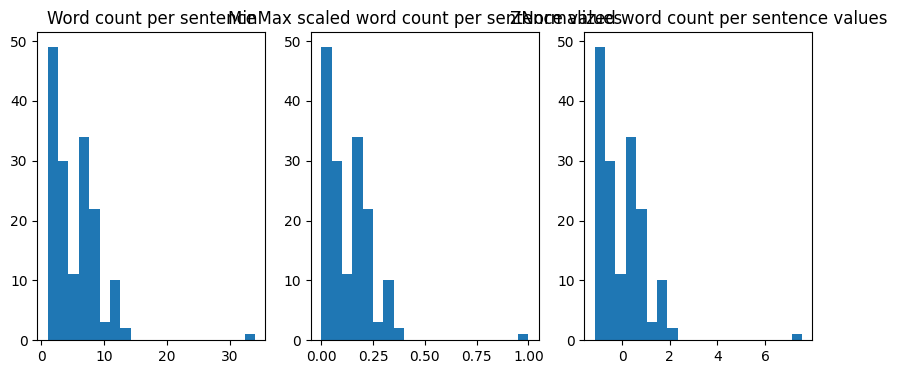

In [21]:
new_text = text.replace('\n', ' ')
new_text = new_text.replace(':', ' ')
new_text = new_text.replace('\"', ' ')
new_text = new_text.replace(',', ' ')
new_text = new_text.replace('-', ' ')
new_text = new_text.replace('”', ' ')

word_count_per_sentence = [len(x) for x in new_text.split(' ') if len(x) > 0]

minn = min(word_count_per_sentence)
maxx = max(word_count_per_sentence)
mean = np.mean(word_count_per_sentence)
std = np.std(word_count_per_sentence)

minmax_scaled_word_count_per_sentence = [(x - minn) / (maxx - minn) for x in word_count_per_sentence]
znormalized_word_count_per_sentence = [(x - mean) / std for x in word_count_per_sentence]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
ax1.hist(word_count_per_sentence, 20)
ax1.set_title('Word count per sentence')
ax2.hist(minmax_scaled_word_count_per_sentence, 20)
ax2.set_title('MinMax scaled word count per sentence values')# 
ax3.hist(znormalized_word_count_per_sentence, 20)
ax3.set_title('ZNormalized word count per sentence values')
plt.show()